In [1]:
""" Realizamos la importacion de la libreria que nos ayuda para la carga de nuestro algoritmo CNN, de igual manera se importo 
librerias para tensorflow que nos ayuda para las redes neuronales y matplotlib para las imagenes"""
import os
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
import math
import logging

In [2]:
""" Realizamos la definicion del tamaño de las imagenes"""
IMG_SHAPE  = 224
batch_size = 32
random_seed = 9

In [3]:
""" Realizamos el ingreso  de la ruta para la distinta carga del dataset"""
fpath = r"C:\Users\Equipo\Documents\MINERIA DE DATOS\LABORATORIALGRUPAL\DatasetSinFondo\Dataset_sin_fondo"
categories = os.listdir(fpath)
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['escala1', 'escala2', 'escala3', 'escala4', 'escala5', 'escala6', 'escala7'] 

No. of categories =  7


In [4]:
""" Realizamos la funcion para cargar las imagenes de nuestro dataset por su distinta categoria y etiqueta"""
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SHAPE, IMG_SHAPE))
            img_array = Image.fromarray(img, 'RGB')
            
            img_lst.append(np.array(img_array))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  1400 
No. of labels loaded =  1400
<class 'list'> <class 'list'>


In [5]:
""" Realizamos la impresion de imagenes y etiquetas"""
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (1400, 224, 224, 3) 
Labels shape =  (1400,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


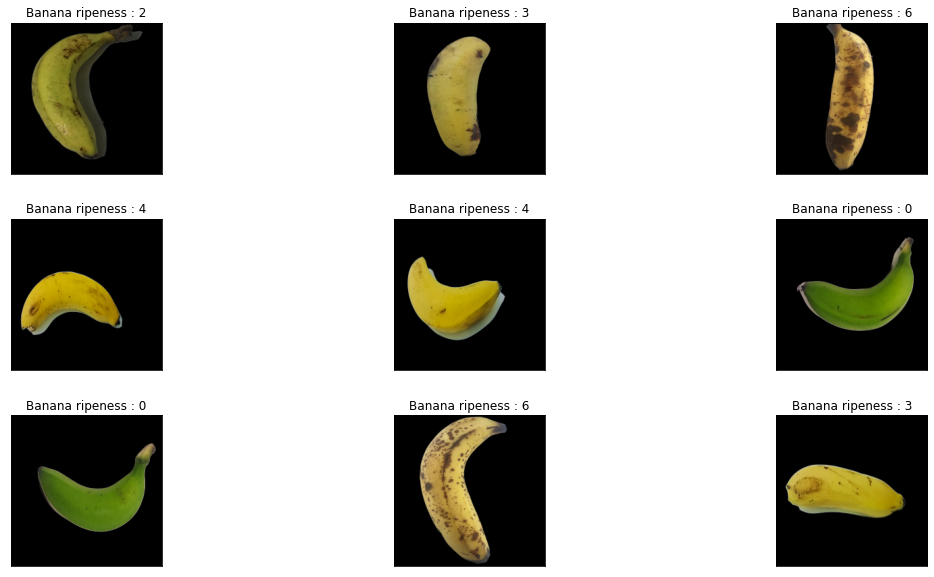

In [6]:
""" Realizamos una funcion para la visualizacion de las imagenes aleatoriamente"""
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Banana ripeness : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

In [7]:
""" Como primer paso realizamos la reorganizacion de los datos y se visualiza que valores estan espaciados para luego mezclar
todos los valores igualmente espaciados en la lista n"""
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 1397 1398 1399]

'n' values after shuffling =  [ 196 1358  271 ...  638  348  382]


In [8]:
"""Como  segundo paso se realiza la mezcla de datos y se genera aleatoriamente varias etiquetas """
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (1400, 224, 224, 3) 
Labels shape after shuffling =  (1400,)


In [9]:
""" Realizamos la normalizacion de los datos"""
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (1400, 224, 224, 3)


In [10]:
""" Realizamos su  respectivo entrenamiento"""
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

x_val = x_train[:58]
y_val = y_train[:58]
x_train = x_train[58:]
y_train = y_train[58:]

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

print("\nx_val shape = ",x_val.shape)
print("y_val shape = ",y_val.shape)

x_train shape =  (1062, 224, 224, 3)
y_train shape =  (1062,)

x_test shape =  (280, 224, 224, 3)
y_test shape =  (280,)

x_val shape =  (58, 224, 224, 3)
y_val shape =  (58,)


In [11]:
""" Visualizamos la estructura One -hot - encode"""
y_train = to_categorical(y_train, 7)
y_test = to_categorical(y_test, 7)
y_val = to_categorical(y_val, 7)

In [12]:
""" Realizamos la estructura del modelo"""
model = tf.keras.Sequential(
    [
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation="relu",input_shape=x_train[0].shape),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(7, activation="softmax")
]
)

In [13]:
"""Realizamos la optimizacion del modelo"""
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['acc'])

In [14]:
"""Visualizamos el resumen"""
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 100)               2

In [15]:
steps_per_epoch = (x_train.shape[0]//batch_size)
validation_steps = (x_val.shape[0] // batch_size)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

In [16]:
""" Visualizamos el tamaño del dataset"""
x_train.shape,y_train.shape

((1062, 224, 224, 3), (1062, 7))

In [17]:
""" Realizamos el respectivo entrenamiento del modelo"""
start_time = time.time()

history = model.fit(x_train, y_train,
    steps_per_epoch=steps_per_epoch,
    epochs = 15,
    validation_data=(x_val, y_val),
    validation_steps=validation_steps,
    batch_size = batch_size,
    callbacks=[es],
    verbose=1)

logging.basicConfig(filename="CNN-withoutTL_log.txt", level=logging.INFO)
logging.info("Training Execution Time:" + time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time)))

Epoch 1/15
33/33 [==============================] - 190s 5s/step - loss: 1.5000 - acc: 0.4309 - val_loss: 0.7920 - val_acc: 0.6875
Epoch 2/15
33/33 [==============================] - 162s 5s/step - loss: 0.7092 - acc: 0.7214 - val_loss: 0.5053 - val_acc: 0.7188
Epoch 3/15
33/33 [==============================] - 162s 5s/step - loss: 0.3400 - acc: 0.8709 - val_loss: 0.3634 - val_acc: 0.8125
Epoch 4/15
33/33 [==============================] - 170s 5s/step - loss: 0.1793 - acc: 0.9272 - val_loss: 0.4170 - val_acc: 0.8750
Epoch 5/15
33/33 [==============================] - 158s 5s/step - loss: 0.0943 - acc: 0.9670 - val_loss: 0.7490 - val_acc: 0.7500
Epoch 6/15
33/33 [==============================] - 159s 5s/step - loss: 0.0705 - acc: 0.9806 - val_loss: 0.7671 - val_acc: 0.8438
Epoch 7/15
33/33 [==============================] - 165s 5s/step - loss: 0.0408 - acc: 0.9903 - val_loss: 0.6389 - val_acc: 0.8438
Epoch 8/15
33/33 [==============================] - 158s 5s/step - loss: 0.0717 - a

In [18]:
start_time = time.time()

loss, accuracy = model.evaluate(x_test,y_test,batch_size=batch_size)
print('test_loss: %.2f' % (loss * 100.0))  
print('test_accuracy: %.2f' % (accuracy * 100.0))

logging.info("Evaluation Execution Time: " + time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time)))
logging.info("test_loss:" + str(loss))
logging.info("test accuracy:" + str(accuracy))

9/9 [==============================] - 12s 1s/step - loss: 1.4251 - acc: 0.7250
test_loss: 142.51
test_accuracy: 72.50


In [19]:
model_probs = model.predict(x_test,batch_size=batch_size,verbose=0)
""" Realizamos la prediccion de las clases nítidas para el conjunto de pruebas """
model_classes = np.argmax(model_probs,axis=1)
""" Realizamos la reduccion de la matriz """
model_probs = model_probs[:, 0]
y_test_reduced = np.argmax(y_test,axis=1)
""" Procedemos a realizar las diferentes metricas """
"""accuracy: (tp + tn) / (p + n) """
accuracy = accuracy_score(y_test_reduced, model_classes)*100
"""precision tp / (tp + fp) """
precision = precision_score(y_test_reduced, model_classes, average='weighted')*100
"""recall: tp / (tp + fn) """
recall = recall_score(y_test_reduced, model_classes, average='weighted')*100
"""f1: 2 tp / (2 tp + fp + fn)  """
f1 = f1_score(y_test_reduced, model_classes, average='weighted')*100

print('Accuracy: %.2f' % accuracy)
print('F1 score: %.2f' % f1)
print('Precision: %.2f' % precision)
print('Recall: %.2f' % recall)

logging.info('Accuracy: %.2f' % accuracy)
logging.info('F1 score: %.2f' % f1)
logging.info('Precision: %.2f' % precision)
logging.info('Recall: %.2f' % recall)

Accuracy: 72.50
F1 score: 72.81
Precision: 73.61
Recall: 72.50


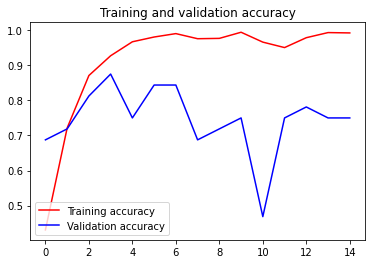

In [20]:
accuracy = history.history['acc']
validation_accuracy = history.history['val_acc']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.savefig("Training and validation accuracy - CNN-without TL.png")
plt.show()

In [22]:
y_pred = model.predict(x_test)

9/9 [==============================] - 12s 1s/step


In [23]:
y_pred.round()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
accuracy_score(y_test, y_pred.round())*100

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_pred.round(), y_test))

In [ ]:
accuracy = model.evaluate(x_test,y_test,batch_size=32)
print("Accuracy: ",accuracy[1]*100)

In [ ]:
Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 

In [ ]:
report = classification_report(Y_true, Y_pred_classes, target_names=categories)
print(report)

In [ ]:
import seaborn  as sns
plt.figure(figsize=(30, 20))

ax = sns.heatmap(confusion_matrix(Y_true,Y_pred_classes))
ax.set_title('Confusion Matrix with labels')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(categories)
ax.yaxis.set_ticklabels(categories)

plt.show()

In [ ]:
confusion = confusion_matrix(Y_true,Y_pred_classes)
print('Confusion Matrix\n')
print(confusion)

In [ ]:
plt.figure(figsize=(30, 20))
sns.heatmap(confusion, cmap="plasma", annot=True)